In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
Iris=pd.read_csv("C:\\Users\\intel\\Desktop\\IG_AI\\iris.csv")
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
Iris.shape

(150, 5)

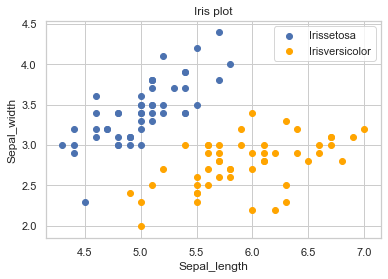

In [4]:
#visualization of given dataset
#codesegment4------------------
#As the data is sorted upto 50 Irissetosa are present
#from 50 to 100 Iris versicolor flowers are present
plt.scatter(Iris['sepal_length'][0:50],Iris['sepal_width'][0:50],
         label='Irissetosa',color='b')
plt.scatter(Iris['sepal_length'][50:100],Iris['sepal_width'][50:100],
           label='Irisversicolor',color='#FFA500')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.legend(loc='best')
plt.title("Iris plot")
plt.show()

In [64]:
#this mean drop the labels coloum and output all other values
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Y=Encoder.fit_transform(Y)

In [65]:
def make_set(A):
    S=set()
    for i in range(np.size(A,0)):
        for j in range(np.size(A,1)):
            S.add(A[i][j])
    return S

In [66]:
'''Step 3: Split data
trainset: 80%
testset: 20%'''
# set seed for numpy and tensorflow
np.random.seed(seed=5)
# set for reproducible results
seed = 5
#line5-------------
X=X[0:100][:]
dataset_size=np.size(X,0)
train_size=int(dataset_size*0.8)
train_index=np.random.randint(0,100,train_size)
#line6-------------
#randomnly select 80% of the indices under variable train_index and rest under test_index
#line7-----------------------------------------------
test_index = np.array(list(set(range(len(X))) - set(train_index)))
test_index = np.array(list(set(range(len(X))) - set(train_index)))

In [67]:
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]

In [68]:
# Define the min-max normalization function
# we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
#codesegment8-----------------
def min_max_normalized(data):
    data_min=min(data)
    data_max=max(data)
    Data=(data-data_min)/(data_max-data_min)
    return Data

In [69]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4, 1)
#line9---------------------------- #weights
w = tf.Variable(tf.random_normal(shape=[4, 1],seed=0))
b = tf.Variable(tf.random_normal(shape=[1, 1],seed=0)) #bias
#constructor for random initialization
#line10

In [70]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])
#comment on the difference between tf.placeholder and tf.variable-----
#tf.placeholder is a node in computational graph where we first build the node
#to specify the size and togology of the data and then give it numerical values
#tf.varialbe is an dataentity with can change its values and assgined at any point
#of time
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [71]:
# Declare the 'model' you need to learn
#line11-------------------------------------------
mod=tf.add(tf.matmul(data,w),b)

In [72]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model 
#result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, 
                                                              labels=target))

In [137]:
# Define the learning rate， batch_size and number of iterations.
#learning_rate
'''The rate at which the graident descents is know as learning rate'''
'''i.e rate at which function value move to local optimum(max or min)'''
learning_rate=pow(10,-2)
#line12--------------------------------
#batch_size----
batch_size=10
''' The size of data which is used to caliculate the mean error and then 
backpropagate the error is know as batch_size'''
'''in gradient base optimizations we have 3 type of methods 
1.batch_traning size=whole data set size
2.Mini_batch traning= optimal size
3.Stochaticated Gradient= single sized'''
#using batch makes the training ------?
'''faster'''
#line13--------------------------------
iter_num=1000
#iter_num

In [138]:
# Define the optimizer with name opt
#line14-----------------------------
# Define the goal
opt=tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate)
goal = opt.minimize(loss)

In [139]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [140]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc=[]

In [141]:
init=tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [142]:
# training model using mini-batch gradient descent
for epoch in range(iter_num):
    # Generate random batch_index
    #line15------------------------------ #randomnly picks up up 30 sample data
    batch_index=np.random.randint(0,80,30)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    batch_index=np.random.randint(0,44,30)
    batch_test_X =test_X[batch_index]
    batch_test_y = np.matrix(test_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_train_acc = sess.run(accuracy,feed_dict={data:batch_train_X,target:batch_train_y})
    temp_test_acc = sess.run(accuracy,feed_dict={data:batch_test_X,target:batch_test_y})
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    if (epoch + 1) % 100 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                            temp_train_acc, temp_test_acc))
print("The test accuracy is: {:5f}".format(temp_test_acc))

epoch:  100 loss: 0.567381 train_acc: 0.733333 test_acc: 0.666667
epoch:  200 loss: 0.416554 train_acc: 0.933333 test_acc: 1.000000
epoch:  300 loss: 0.249559 train_acc: 1.000000 test_acc: 1.000000
epoch:  400 loss: 0.211868 train_acc: 1.000000 test_acc: 1.000000
epoch:  500 loss: 0.133442 train_acc: 1.000000 test_acc: 1.000000
epoch:  600 loss: 0.108169 train_acc: 1.000000 test_acc: 1.000000
epoch:  700 loss: 0.115290 train_acc: 1.000000 test_acc: 1.000000
epoch:  800 loss: 0.080931 train_acc: 1.000000 test_acc: 1.000000
epoch:  900 loss: 0.073999 train_acc: 1.000000 test_acc: 1.000000
epoch: 1000 loss: 0.065799 train_acc: 1.000000 test_acc: 1.000000
The test accuracy is: 1.000000


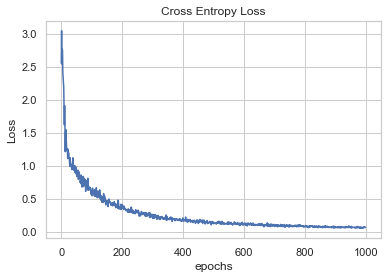

In [144]:
# Visualization of the results
# loss function
#codesegment19------------------------
x=range(0,iter_num)
plt.plot(x,loss_trace,color='b')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss')
plt.show()

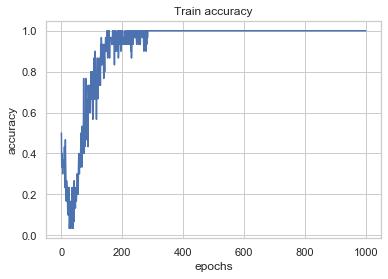

In [146]:
# plot for training accuracy
#codesegment20---------------------------
plt.plot(x,train_acc,color='b')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("Train accuracy")
plt.show()